In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 기본 경로 설정
%cd /content/drive/MyDrive/Colab Notebooks/2021-2 인공지능/

/content/drive/MyDrive/Colab Notebooks/2021-2 인공지능


In [3]:
# 라이브러리 불러오기
import pandas as pd               # 데이터 처리
import matplotlib.pyplot as plt   # 시각화
import seaborn as sns             # 시각화

## Data load

**Dataset information** :

Number of instances 1030

Number of Attributes 9


**Attribute information** : 

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable


In [4]:
# 데이터 불러오기
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## EDA (Exploratory data analysis)

In [5]:
# 데이터 통계량 요약
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


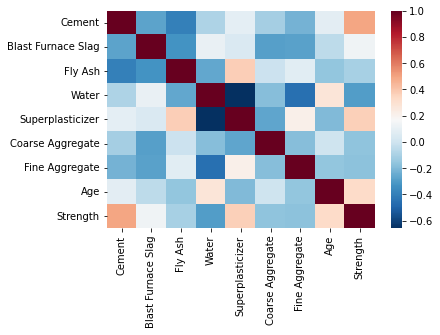

In [8]:
# 데이터 상관계수 계산 후 heatmap 그리기
corr = df.corr()
sns.heatmap(corr, cmap='RdBu_r')

### Boxplot

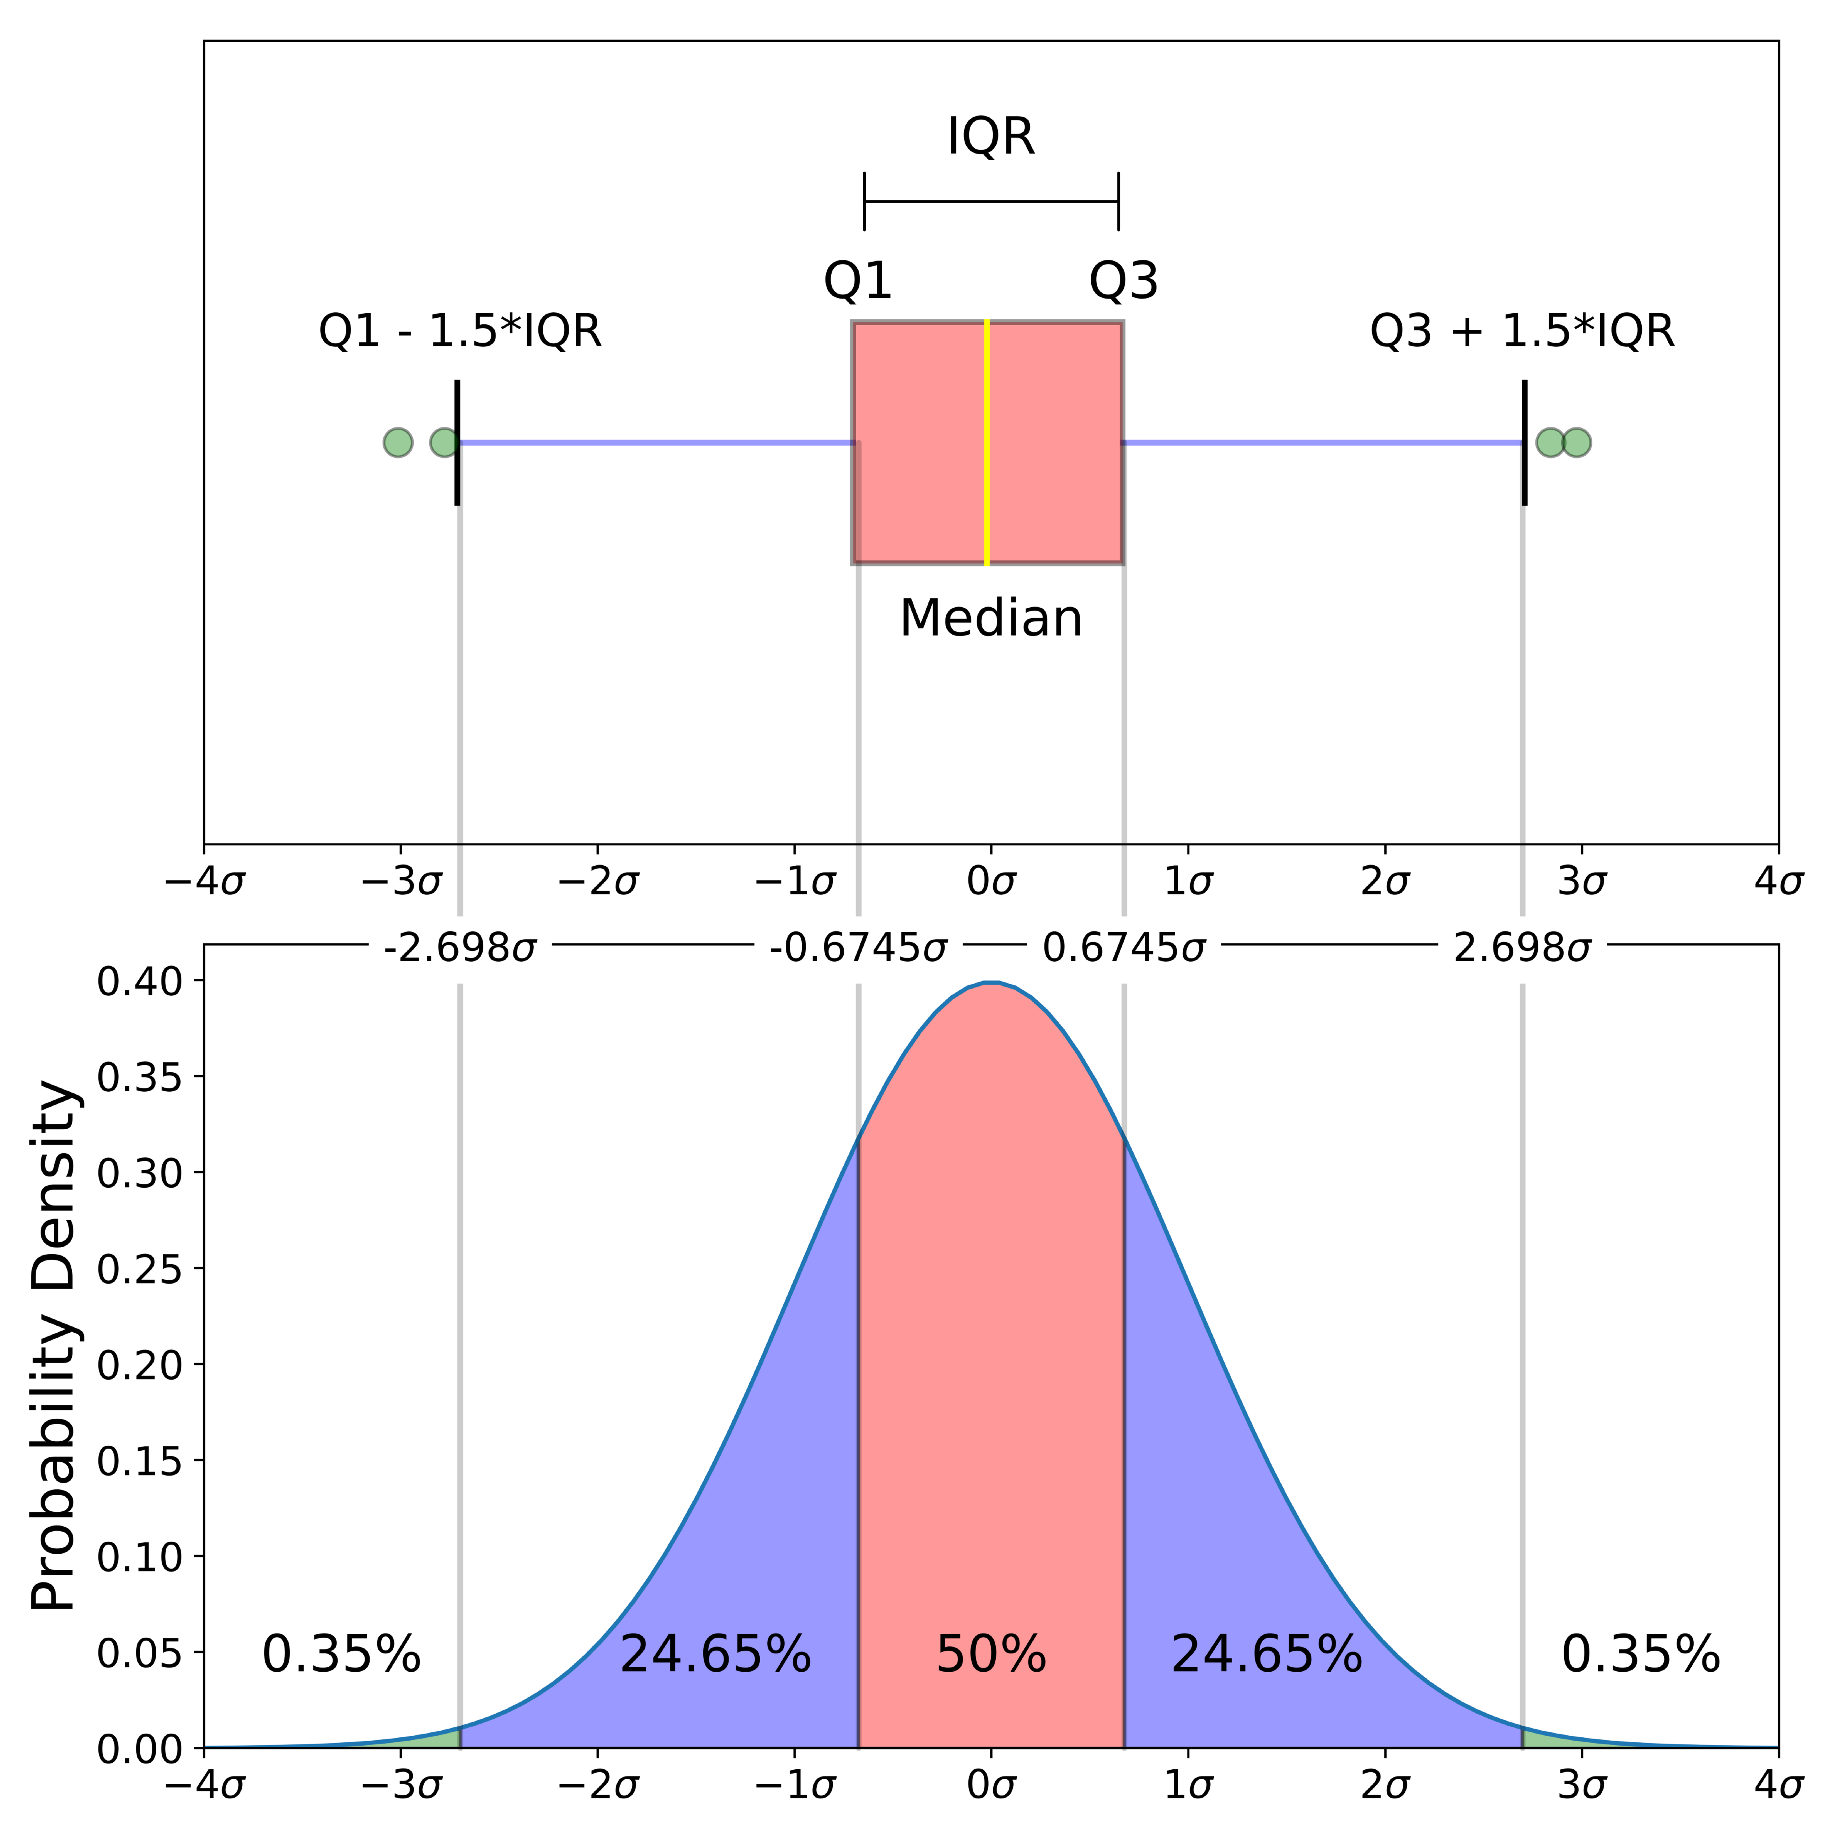

In [ ]:
# Boxplot 설명
from IPython.display import Image
Image('boxplot.jpg', width = 800, height = 800)

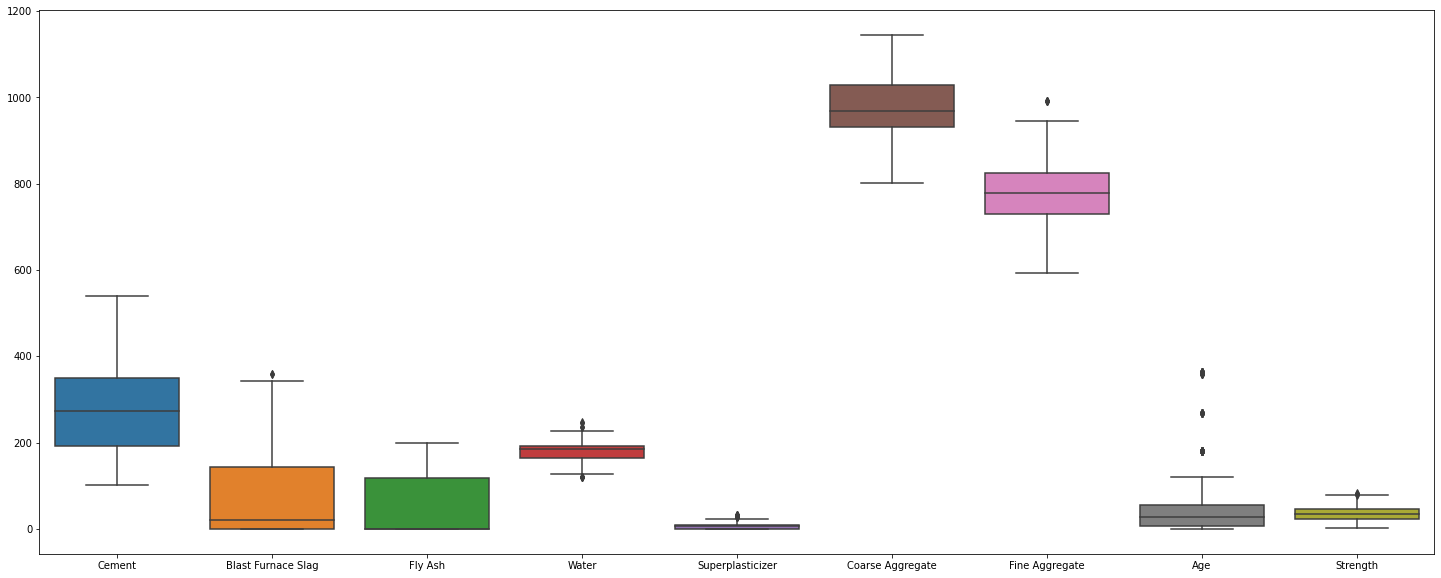

In [11]:
# Boxplot 그리기
plt.figure(figsize=(25,10))
sns.boxplot(data=df)

## Data preprocessing

### Missing values

In [13]:
# 결측치 존재 여부 파악
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### Outliers

In [15]:
# 이상치 존재 여부 파악
outlier_index=[]
for i in range(df.shape[1]-2):
    Q1 = df[df.columns[i]].quantile(0.25)
    Q3 = df[df.columns[i]].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[df.columns[i]] < Q1 - 1.5 * IQR) | (df[df.columns[i]] > Q3 + 1.5 *IQR)
    outlier_index+=list(df.loc[filter].index)
    print(df.columns[i],":",list(df.loc[filter].index))
print('===>Number of outliers:', len(outlier_index))

Cement : []
Blast Furnace Slag : [553, 559]
Fly Ash : []
Water : [224, 225, 226, 227, 228, 862, 873, 936, 1019]
Superplasticizer : [76, 79, 99, 102, 122, 125, 145, 148, 168, 171]
Coarse Aggregate : []
Fine Aggregate : [74, 97, 120, 143, 166]
===>Number of outliers: 26


In [16]:
# 이상치 제거
df.drop(index=outlier_index, inplace=True)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [17]:
# index 리셋
df.reset_index(drop=True, inplace=True)

## Regression

### Split data

In [18]:
# 데이터 분리 (train/test) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

Shape of X_train: (702, 8)
Shape of y_train: (702,)


### Scaling

In [20]:
# 데이터 스케일 조정
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_tset_scaled = scaler.transform(X_test)

### Elastic Net

In [21]:
# Elastic Net
from sklearn.linear_model import ElasticNet
en = ElasticNet().fit(X_train, y_train)
print(en.score(X_train, y_train))
print(en.score(X_test, y_test))

0.6306127002213759
0.6044425615378219


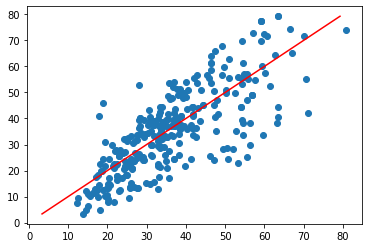

In [22]:
# Elastic Net 예측 결과
y_pred = en.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], 'r')

### Support Vector Machine

In [23]:
# Support vector mcahine
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.22211740601203556
0.22136980526900707


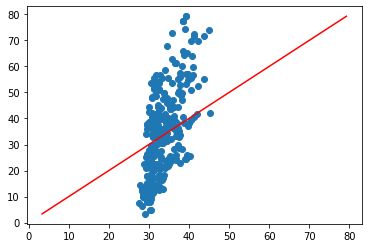

In [24]:
# Support vector mcahine 예측 결과
y_pred = svr.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], 'r')

### Random Forest

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9872661976101421
0.8766340402290972


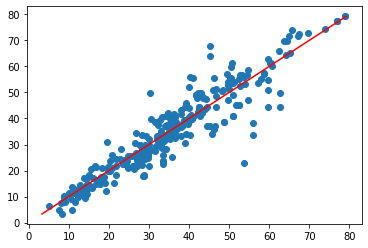

In [27]:
# Random Forest 예측 결과
y_pred = rf.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], 'r')

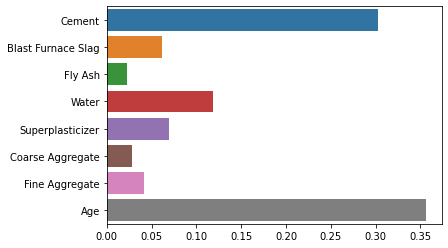

In [29]:
# 변수 중요도
sns.barplot(x=rf.feature_importances_, y=df.columns[:-1])

### Hyperparameter tuning

In [30]:
# Grid search를 이용한 hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
               'C': [1, 2, 3]}]
gs = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5)
result = gs.fit(X_train, y_train)

In [33]:
print(result.best_score_)
print(result.best_params_)
pd.DataFrame(result.cv_results_)

0.5679300998896656
{'C': 3, 'kernel': 'linear'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.665118,0.849136,0.004373,0.000144,1,linear,"{'C': 1, 'kernel': 'linear'}",0.659646,0.407785,0.614882,0.516120,0.519904,0.543668,0.087533,4
1,0.015608,0.000416,0.004151,0.000226,1,poly,"{'C': 1, 'kernel': 'poly'}",0.430829,0.351136,0.415008,0.435594,0.393241,0.405161,0.030799,6
2,0.022896,0.001800,0.007351,0.000770,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.216959,0.160538,0.200440,0.183848,0.181980,0.188753,0.018964,9
3,0.030370,0.000162,0.008364,0.000228,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.024886,0.011768,0.016381,-0.002066,0.023943,0.014982,0.009811,12
4,7.395115,1.443510,0.004564,0.000500,2,linear,"{'C': 2, 'kernel': 'linear'}",0.659335,0.420462,0.616311,0.517458,0.518521,0.546417,0.083806,3
5,0.015974,0.000332,0.004248,0.000114,2,poly,"{'C': 2, 'kernel': 'poly'}",0.559811,0.435802,0.533787,0.562899,0.491999,0.516860,0.047831,5
6,0.022691,0.000566,0.007986,0.001751,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.301992,0.227249,0.287150,0.276104,0.255898,0.269678,0.026003,8
7,0.030754,0.000684,0.008137,0.000165,2,sigmoid,"{'C': 2, 'kernel': 'sigmoid'}",0.051081,0.035777,0.044645,0.025876,0.045790,0.040634,0.008868,11
8,15.992813,9.487368,0.004600,0.000461,3,linear,"{'C': 3, 'kernel': 'linear'}",0.672537,0.432375,0.630522,0.573284,0.530932,0.567930,0.083226,1
9,0.016848,0.000248,0.004227,0.000096,3,poly,"{'C': 3, 'kernel': 'poly'}",0.598426,0.470194,0.578941,0.608543,0.532966,0.557814,0.050919,2
